In [2]:
import pandas as pd

df = pd.read_csv('equipment_anomaly_data.csv')

print(df.head())

   temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   faulty  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [3]:

faulty_value_with_one= df[(df['faulty'] ==1)]
faulty_value_with_one

df[(df['vibration'] < 0) & (df['faulty'] == 0)]
df['faulty'].value_counts()


mean_temp = df['temperature'].mean()
df[(df['temperature'] > mean_temp) & (df['faulty'] == 1)]

equipment_and_faulty=df[(df['equipment']=='Pump') & (df['faulty']<1)]
equipment_and_faulty

df.isnull().sum()
#df['temperature'].max()
#df['vibration'].max()

df.describe(include='all')

df['equipment'].value_counts().head(1)
df['location'].value_counts().head(1)
df.groupby(['equipment', 'faulty']).size()
df.groupby(['location', 'faulty']).size()
df[df['location']=='San Francisco'].groupby("faulty").count()
df.groupby('equipment')[['temperature', 'vibration']].mean()
df.groupby('location')[['temperature', 'vibration']].mean()
df[(df['pressure'] < df['pressure'].mean()) & (df['faulty'] == 1)]
df[(df['humidity'] < df['humidity'].mean()) & (df['faulty'] == 1)]
mean_temp = df['temperature'].mean()
mean_vib = df['vibration'].mean()
df[(df['temperature'] < mean_temp) & (df['faulty'] == 1)]
df[(df['temperature'] > mean_temp) & (df['faulty'] == 1)]
df[(df['vibration'] > mean_vib) & (df['faulty'] == 1)]
df[(df['vibration'] < mean_vib) & (df['faulty'] == 1)]
df[((df['temperature'] < mean_temp) | ((df['temperature'] > mean_temp))) & (df['faulty'] == 0)]
df[((df['vibration'] < mean_temp) | ((df['vibration'] > mean_temp))) & (df['faulty'] == 0)]
df.describe(include='all')
q1_temperature=df.temperature.quantile(0.25)
q3_temperature=df.temperature.quantile(0.75)
q1_vibration=df.vibration.quantile(0.25)
q3_vibration=df.vibration.quantile(0.75)
q1_pressure=df.pressure.quantile(0.25)
q3_pressure=df.pressure.quantile(0.75)
q1_humidity=df.humidity.quantile(0.25)
q3_humidity=df.humidity.quantile(0.75)
iqr_temperature=q3_temperature-q1_temperature
lower_limit_temperature=q1_temperature-1.5*iqr_temperature
upper_limit_temperature=q3_temperature+1.5*iqr_temperature

iqr_vibration=q3_vibration-q1_vibration
lower_limit_vibration=q1_vibration-1.5*iqr_vibration
upper_limit_vibration=q3_vibration+1.5*iqr_vibration

iqr_pressure=q3_pressure-q1_pressure
lower_limit_pressure=q1_pressure-1.5*iqr_pressure
upper_limit_pressure=q3_pressure+1.5*iqr_pressure


iqr_humidity=q3_humidity-q1_humidity
lower_limit_humidity=q1_humidity-1.5*iqr_humidity
upper_limit_humidity=q3_humidity+1.5*iqr_humidity

outlier_remove=df[((df['temperature']>=lower_limit_temperature) & (df['temperature']<=upper_limit_temperature))   & ((df['pressure']>=lower_limit_pressure) & (df['pressure']<=upper_limit_pressure)) & ((df['vibration']>=lower_limit_vibration) & (df['vibration']<=upper_limit_vibration)) &  ((df['humidity']>=lower_limit_humidity) & (df['humidity']<=upper_limit_humidity))]
outlier_remove


,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0
...,...,...,...,...,...,...,...
7665,62.179965,36.422638,1.565271,51.606218,Turbine,Atlanta,0.0
7666,69.587073,45.760937,1.269738,60.915675,Compressor,Houston,0.0
7667,65.711521,37.505934,2.030521,49.331471,Pump,New York,0.0
7668,63.005855,45.164234,1.264585,61.905390,Pump,New York,0.0


In [4]:
df['temperature'].apply('{:,.2f}'.format)
df['temperature'].notnull().sum()

np.int64(7672)

In [5]:
df['pressure'].apply('{:,.2f}'.format)
df['pressure'].notnull().sum()

np.int64(7672)

In [6]:
df['vibration'].apply('{:,.2f}'.format)
df['vibration'].notnull().sum()

np.int64(7672)

In [7]:
df['humidity'].apply('{:,.2f}'.format)
df['humidity'].notnull().sum()

np.int64(7672)

In [8]:
df['equipment'].value_counts()

equipment
Compressor    2573
Turbine       2565
Pump          2534
Name: count, dtype: int64

In [9]:
df['location'].value_counts()

location
Atlanta          1564
Chicago          1553
Houston          1548
New York         1526
San Francisco    1481
Name: count, dtype: int64

In [10]:
df['location'].unique()

array(['Atlanta', 'Chicago', 'San Francisco', 'New York', 'Houston'],
      dtype=object)

In [11]:
df[df['faulty']>=1]

,temperature,pressure,vibration,humidity,equipment,location,faulty
5,49.510959,76.426729,4.809298,20.269692,Compressor,New York,1.0
7,148.923369,22.214121,0.109819,39.944953,Turbine,San Francisco,1.0
11,141.260310,54.239058,2.725691,86.390466,Pump,Atlanta,1.0
25,117.255657,76.174692,3.255743,82.143058,Pump,New York,1.0
34,135.304401,66.014140,1.070335,62.927459,Turbine,San Francisco,1.0
...,...,...,...,...,...,...,...
7646,97.511253,20.133616,2.178006,14.104007,Pump,Chicago,1.0
7647,85.807050,48.493120,4.903137,49.287131,Turbine,New York,1.0
7651,132.670444,56.635316,2.054762,13.383828,Turbine,Atlanta,1.0
7670,107.086485,23.754114,1.142522,23.967977,Compressor,Atlanta,1.0


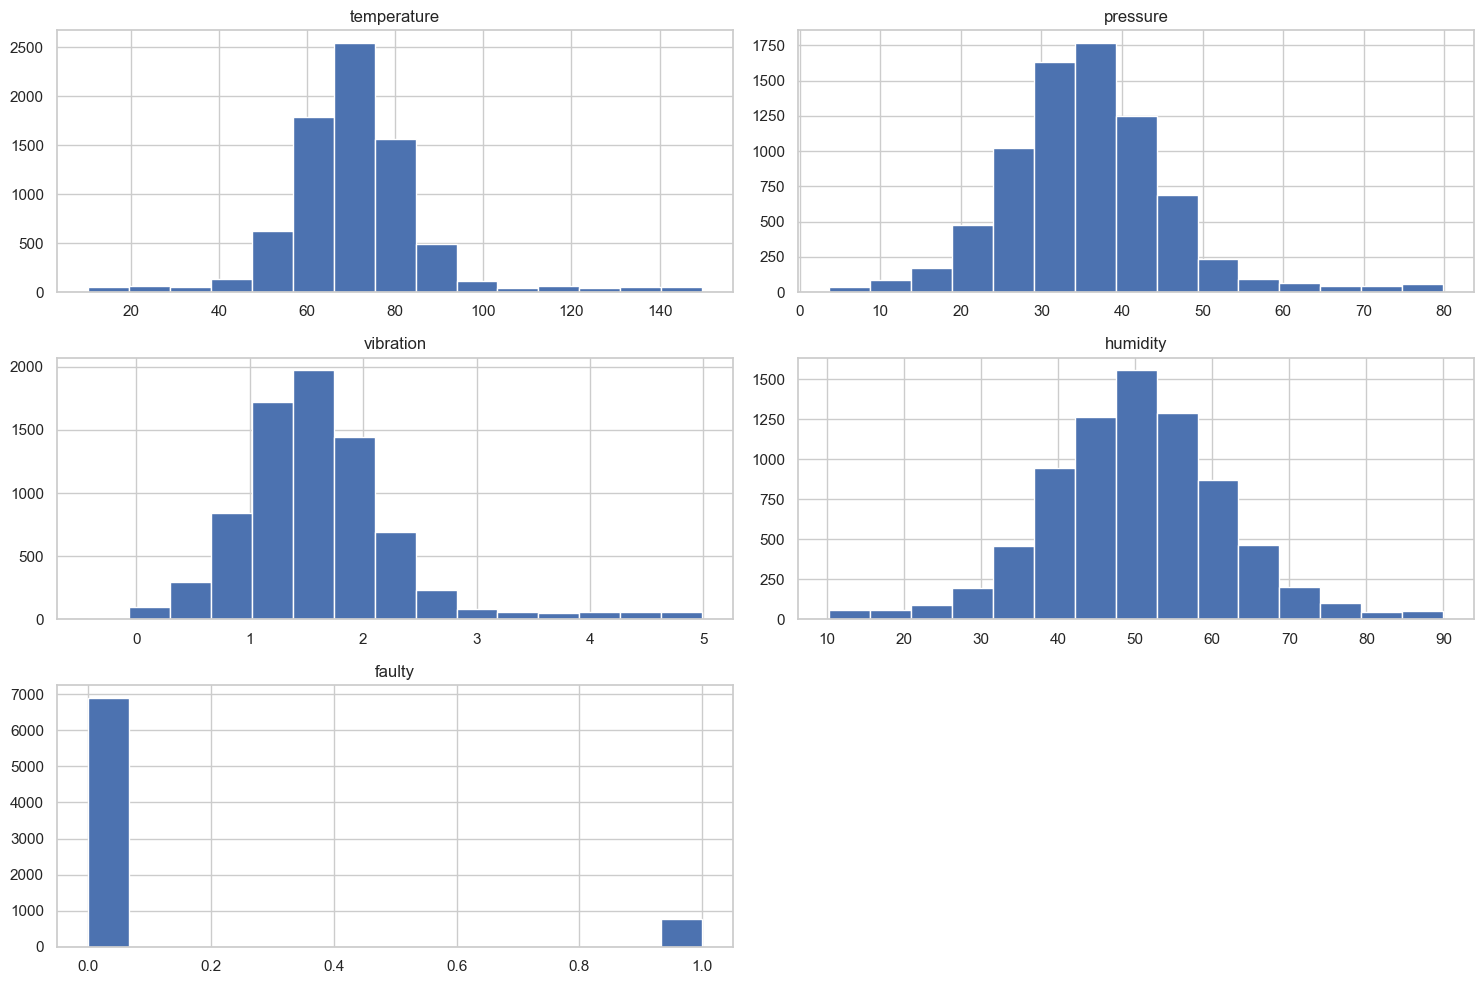

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [13]:
df['location']=df.location.map({'Atlanta':1,'Chicago':2,'San Francisco':3,'New York':4,'Houston':5})
df

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,1,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,2,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,3,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,1,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,4,0.0
...,...,...,...,...,...,...,...
7667,65.711521,37.505934,2.030521,49.331471,Pump,4,0.0
7668,63.005855,45.164234,1.264585,61.905390,Pump,4,0.0
7669,72.029230,34.757896,1.709046,49.972917,Pump,1,0.0
7670,107.086485,23.754114,1.142522,23.967977,Compressor,1,1.0


In [14]:
df['equipment']=df.equipment.map({'Turbine':1,'Compressor':2,'Pump':3})
df

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,1,1,0.0
1,75.740712,22.954018,2.338095,41.867407,2,2,0.0
2,71.358594,27.276830,1.389198,58.954409,1,3,0.0
3,71.616985,32.242921,1.770690,40.565138,3,1,0.0
4,66.506832,45.197471,0.345398,43.253795,3,4,0.0
...,...,...,...,...,...,...,...
7667,65.711521,37.505934,2.030521,49.331471,3,4,0.0
7668,63.005855,45.164234,1.264585,61.905390,3,4,0.0
7669,72.029230,34.757896,1.709046,49.972917,3,1,0.0
7670,107.086485,23.754114,1.142522,23.967977,2,1,1.0


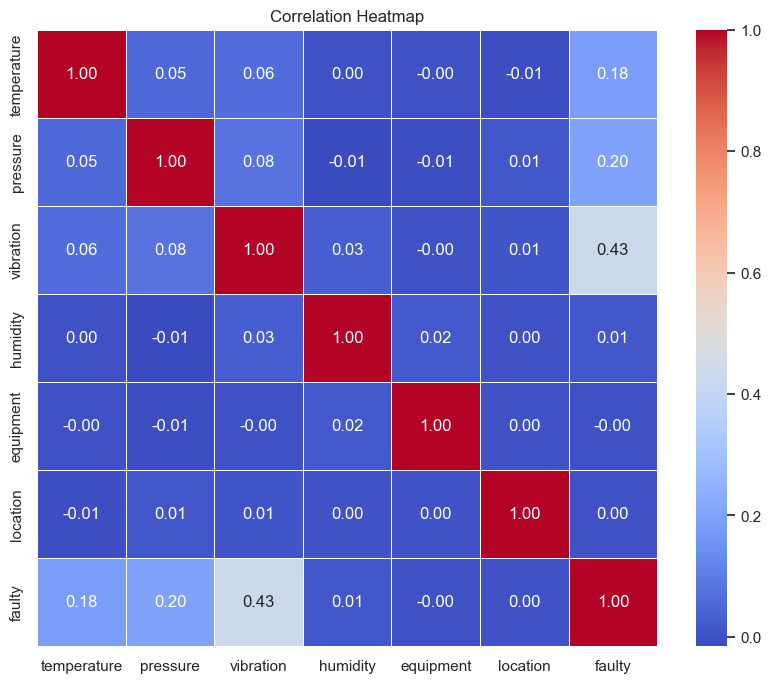

In [15]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X = outlier_remove.drop('faulty', axis=1)  # Assuming 'faulty' is the target variable
y = outlier_remove['faulty']
X = pd.get_dummies(X, drop_first=True) 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import time


sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE class distribution:\n", y_train.value_counts())
print("After SMOTE class distribution:\n", pd.Series(y_train_res).value_counts())

# -------------------
# Train RandomForest
# -------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
rf_model.fit(X_train_res, y_train_res)
training_time = time.time() - start_time

# -------------------
# Predict and evaluate
# -------------------
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n✅ RandomForest + SMOTE Evaluation")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Training Time (seconds): {training_time:.5f}")

# Detailed report
""" print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred)) """


Before SMOTE class distribution:
 faulty
0.0    5447
1.0      84
Name: count, dtype: int64
After SMOTE class distribution:
 faulty
0.0    5447
1.0    5447
Name: count, dtype: int64

✅ RandomForest + SMOTE Evaluation
Accuracy: 0.9746926970354303
Precision: 0.14814814814814814
Recall: 0.25
F1 Score: 0.18604651162790697
Training Time (seconds): 1.91404


' print("\nClassification Report:")\nprint(classification_report(y_test, y_pred, zero_division=0))\n\n# Confusion matrix\nprint("\nConfusion Matrix:")\nprint(confusion_matrix(y_test, y_pred)) '

In [19]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)
rf_model.score(X_test_scaled,y_test)

0.9746926970354303

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time
start_time = time.time()
logistic_model=LogisticRegression(class_weight='balanced')
logistic_model.fit(X_train_scaled,y_train)
end_time = time.time()
training_time = end_time - start_time

In [21]:
y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training Time (seconds):", training_time)
logistic_model.score(X_test_scaled,y_test)

Accuracy: 0.5647143890093999
Precision: 0.0165016501650165
Recall: 0.625
F1 Score: 0.03215434083601286
Training Time (seconds): 0.060578107833862305


0.5647143890093999

In [22]:
importances = model.feature_importances_

# Create a DataFrame for visualization
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

NameError: name 'model' is not defined

In [ ]:
from rdflib import Graph, Literal, RDF, URIRef, Namespace
from rdflib.namespace import XSD, RDFS, OWL, FOAF

In [ ]:
g = Graph()

# Define namespaces
SOSA = Namespace("http://www.w3.org/ns/sosa/")
SSN = Namespace("http://www.w3.org/ns/ssn/")
SAREF = Namespace("https://w3id.org/saref#")
EX = Namespace("http://example.org/industrial#")

# Bind prefixes for readability
g.bind("sosa", SOSA)
g.bind("ssn", SSN)
g.bind("saref", SAREF)
g.bind("ex", EX)

In [ ]:

for idx, row in df.iterrows():
   
    obs_uri = EX[f"Observation{idx+1}"]
    device_uri = EX[row['equipment']]
    loc_uri = EX[row['location']]
    
    g.add((device_uri, RDF.type, SAREF.Device))
    
    g.add((loc_uri, RDF.type, SOSA.FeatureOfInterest))
    
    g.add((obs_uri, RDF.type, SOSA.Observation))
    g.add((obs_uri, SOSA.madeBySensor, device_uri))
    g.add((obs_uri, SOSA.hasFeatureOfInterest, loc_uri))
    
    g.add((EX['Temperature'], RDF.type, SOSA.ObservableProperty))
    g.add((EX['Pressure'], RDF.type, SOSA.ObservableProperty))
    g.add((EX['Vibration'], RDF.type, SOSA.ObservableProperty))
    g.add((EX['Humidity'], RDF.type, SOSA.ObservableProperty))
    
    g.add((obs_uri, SOSA.observedProperty, EX['Temperature']))
    g.add((obs_uri, SOSA.hasSimpleResult, Literal(row['temperature'], datatype=XSD.float)))
    
    g.add((obs_uri, SOSA.observedProperty, EX['Pressure']))
    g.add((obs_uri, SOSA.hasSimpleResult, Literal(row['pressure'], datatype=XSD.float)))
    
    g.add((obs_uri, SOSA.observedProperty, EX['Vibration']))
    g.add((obs_uri, SOSA.hasSimpleResult, Literal(row['vibration'], datatype=XSD.float)))
    
    g.add((obs_uri, SOSA.observedProperty, EX['Humidity']))
    g.add((obs_uri, SOSA.hasSimpleResult, Literal(row['humidity'], datatype=XSD.float)))
    
    g.add((device_uri, SAREF.hasFault, Literal(row['faulty'], datatype=XSD.boolean)))


In [ ]:
# Save graph as Turtle file
g.serialize("industrial_data.ttl", format="turtle")

# Print graph in Turtle format
print(g.serialize(format="turtle"))


In [ ]:
from rdflib.plugins.sparql import prepareQuery

# Define SPARQL query
q = prepareQuery("""
    PREFIX saref: <https://w3id.org/saref#>
    PREFIX ex: <http://example.org/industrial#>

    SELECT ?device ?fault
    WHERE {
        ?device a saref:Device ;
                saref:hasFault ?fault .
        FILTER(?fault = true)
    }
""")

# Run query
for row in g.query(q):
    print(f"Device: {row.device}, Fault: {row.fault}")


In [ ]:
q2 = prepareQuery("""
    PREFIX sosa: <http://www.w3.org/ns/sosa/>
    PREFIX ex: <http://example.org/industrial#>

    SELECT ?obs ?value
    WHERE {
        ?obs a sosa:Observation ;
             sosa:observedProperty ex:Temperature ;
             sosa:hasSimpleResult ?value .
    }
    ORDER BY DESC(?value)
    LIMIT 5
""")

for row in g.query(q2):
    print(f"Observation: {row.obs}, Temperature: {row.value}")
